# Housing Splitted Project (Flip Robo Technologies)

### Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.
Technical Requirements:

• Data contains 1460 entries each having 81 variables.

• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. You need to handle them accordingly.

• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.

• You need to find important features which affect the price positively or negatively.

• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

The “Data file.csv” and “Data description.txt” are enclosed with this file.

#### To download the dataset, use the link given below :

https://github.com/SANJAY9068068086/Machine-Learning-DataSets/blob/e4319b5226504b5dd669f76515b889f34b90baca/Project-Housing_splitted.zip

In [1]:
# Let's import the necesary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's import the datasets

train_data = pd.read_csv("train.csv")  # Train dataset
test_data = pd.read_csv("test.csv")    # Test dataset
train_data["Source"] = 1         # Create "Source" column and filled it with Train
test_data["Source"] = 0           # Create "Source" column and filled it with Test
data = pd.concat([train_data, test_data], ignore_index=True) # Merge the train and test datasets with new name
data.head()   # Show the merged dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Source
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0,1
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0,1
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0,1
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0,1
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0,1


In [3]:
# Shape of the dataset

data.shape

(1460, 82)

There are 1460 Rows and 82 Columns in this dataset.

In [4]:
# Let's drop the "Id" columns which is not useful

data.drop(columns = ["Id"], axis=1, inplace=True)

In [5]:
# Let's set option to display all the rows

pd.set_option("display.max_rows",None)

In [6]:
# Quick information about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In this dataset, 4 are float columns, 34 are int columns and 44 are object columns.

Our Target is to predict the SalePrice in Test Dataset.

In [7]:
# Let's check the value counts of object column only

for column in data:
    if data[column].dtype=='object':
        print(data[column].value_counts())
        print()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Grvl    50
Pave    41
Name: Alley, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood

In [8]:
# Let's check the null values

feature = data.isnull().sum().keys().tolist()
miss_data = data.isnull().sum().values.tolist()
missing_report = pd.DataFrame(list(zip(feature,miss_data)), columns = ["Columns", "Missing Data"], index=range(1,len(feature)+1))
missing_report["Missing %"] = round(((missing_report["Missing Data"]/data.shape[0])*100),2)
missing_report

,Columns,Missing Data,Missing %
1,MSSubClass,0,0.00
2,MSZoning,0,0.00
3,LotFrontage,259,17.74
4,LotArea,0,0.00
5,Street,0,0.00
6,Alley,1369,93.77
7,LotShape,0,0.00
8,LandContour,0,0.00
9,Utilities,0,0.00
10,LotConfig,0,0.00


While checking the missing data, there are some columns have missed huge data points. So, let's drop that columns which have missed data more than 47%.

In [9]:
# Let's drop the most missed data columns

for col in data:
    if data[col].isnull().sum()*100/data.shape[0]>47:
        data.drop(col,axis=1,inplace=True)

In [10]:
# Now Let's check the missing indexes

index_with_nan = data.index[data.isnull().any(axis=1)]
index_with_nan.shape

(589,)

589 Index have null values. But our dataset have 1460 total index. So, it wil be not good to drop these indexes. So, let's fill these missing index with their mean and mode values.

In [11]:
# Let's First separate the numerical columns and categorical columns

numerical = data.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical = data.select_dtypes(include=["object"]).columns.tolist()

In [12]:
# Now let's fill the null values present in the dataset

for column in data:
    if data[column].isnull().any():
        if column in categorical:
            data[column] = data[column].fillna(data[column].mode()[0])
        else:
            data[column] = data[column].fillna(data[column].mean())

In [13]:
# Let's again check the null values if any present in the dataset

feature = data.isnull().sum().keys().tolist()
miss_data = data.isnull().sum().values.tolist()
missing_data = pd.DataFrame(list(zip(feature, miss_data)), columns = ["Columns", "Missed Data"], index=range(1,len(feature)+1))
missing_data["Missing %"] = round(((missing_data["Missed Data"]/data.shape[0])*100),2)
missing_data

,Columns,Missed Data,Missing %
1,MSSubClass,0,0.0
2,MSZoning,0,0.0
3,LotFrontage,0,0.0
4,LotArea,0,0.0
5,Street,0,0.0
6,LotShape,0,0.0
7,LandContour,0,0.0
8,Utilities,0,0.0
9,LotConfig,0,0.0
10,LandSlope,0,0.0


Now I can see that No any single columns have any null values.

In [14]:
# Now let's check the 0 value counts of each column

for column in data[numerical]:
    print(column+"  =  "+str(data[data[column]==0].shape[0]))

MSSubClass  =  0
LotFrontage  =  0
LotArea  =  0
OverallQual  =  0
OverallCond  =  0
YearBuilt  =  0
YearRemodAdd  =  0
MasVnrArea  =  861
BsmtFinSF1  =  467
BsmtFinSF2  =  1293
BsmtUnfSF  =  118
TotalBsmtSF  =  37
1stFlrSF  =  0
2ndFlrSF  =  829
LowQualFinSF  =  1434
GrLivArea  =  0
BsmtFullBath  =  856
BsmtHalfBath  =  1378
FullBath  =  9
HalfBath  =  913
BedroomAbvGr  =  6
KitchenAbvGr  =  1
TotRmsAbvGrd  =  0
Fireplaces  =  690
GarageYrBlt  =  0
GarageCars  =  81
GarageArea  =  81
WoodDeckSF  =  761
OpenPorchSF  =  656
EnclosedPorch  =  1252
3SsnPorch  =  1436
ScreenPorch  =  1344
PoolArea  =  1453
MiscVal  =  1408
MoSold  =  0
YrSold  =  0
SalePrice  =  0
Source  =  292


Dataset has 1460 Rows, out of these Most of columns have huge amount of 0 values. So, let' drop that columns.

In [15]:
# Let's Drop the columns which have huge amount of 0 values

data.drop(columns=["BsmtFinSF2","LowQualFinSF","BsmtHalfBath","EnclosedPorch","3SsnPorch",
                   "ScreenPorch","PoolArea","MiscVal"], axis=1, inplace=True)

In [16]:
# Let's again separate the numerical columns and categorical columns

numerical = data.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical = data.select_dtypes(include=["object"]).columns.tolist()

<AxesSubplot:>

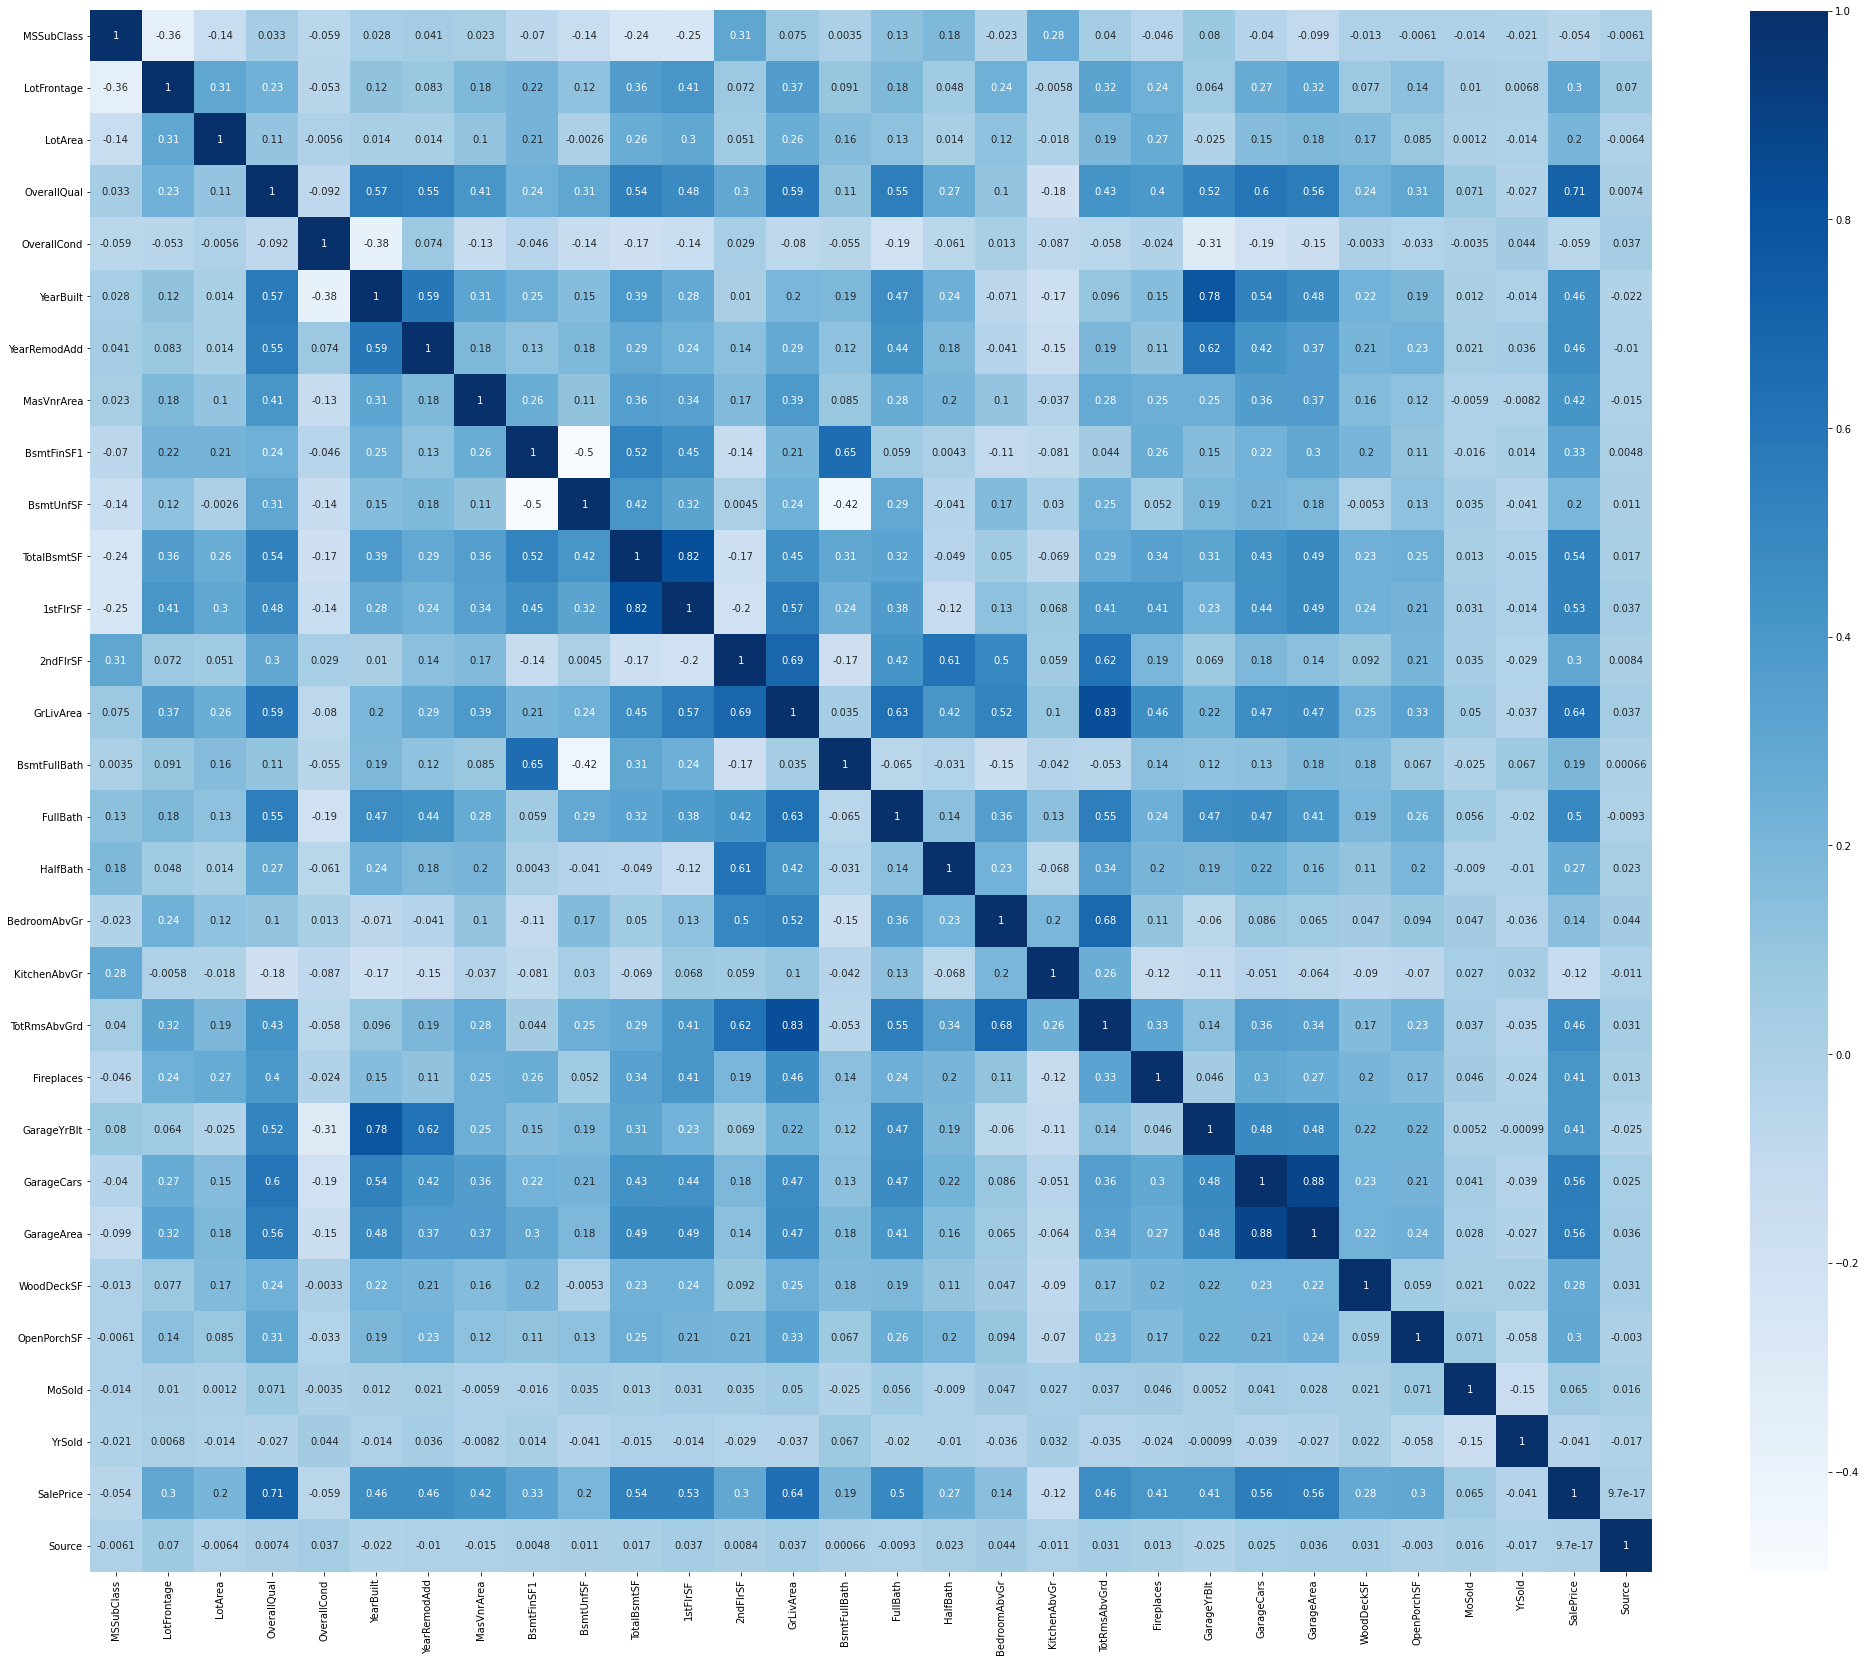

In [17]:
# Let's check the correlation matrix

corr = data[numerical].corr()

plt.figure(figsize=(35,35))
sns.heatmap(corr, cbar=True, annot=True, cbar_kws={"shrink":.82}, annot_kws={"size":10}, cmap="Blues", square=True, fmt=".2g")

Heatmap cleared that not a single numerical is highly correlated to each other.

In [18]:
# Let's check the skewness

print(data.skew())
print("\n\nTotal number of numerical columns count : ",len(data.skew()))
print("Total number of columns which are significant skewed : ",len(data.skew().loc[abs(data.skew())>0.5]))

MSSubClass       1.407657
LotFrontage      2.384950
LotArea         12.207688
OverallQual      0.216944
OverallCond      0.693067
YearBuilt       -0.613461
YearRemodAdd    -0.503562
MasVnrArea       2.676412
BsmtFinSF1       1.685503
BsmtUnfSF        0.920268
TotalBsmtSF      1.524255
1stFlrSF         1.376757
2ndFlrSF         0.813030
GrLivArea        1.366560
BsmtFullBath     0.596067
FullBath         0.036562
HalfBath         0.675897
BedroomAbvGr     0.211790
KitchenAbvGr     4.488397
TotRmsAbvGrd     0.676341
Fireplaces       0.649565
GarageYrBlt     -0.668175
GarageCars      -0.342549
GarageArea       0.179981
WoodDeckSF       1.541376
OpenPorchSF      2.364342
MoSold           0.212053
YrSold           0.096269
SalePrice        2.183940
Source          -1.501543
dtype: float64


Total number of numerical columns count :  30
Total number of columns which are significant skewed :  23


In [19]:
'''
# zscore technique to remove the skewness

from scipy.stats import zscore

z = np.abs(zscore(data[numerical]))
data = data[(z<3).all(axis=1)]

'''

# zscore technique removed huge data. So, that's why I am not using it

'\n# zscore technique to remove the skewness\n\nfrom scipy.stats import zscore\n\nz = np.abs(zscore(data[numerical]))\ndata = data[(z<3).all(axis=1)]\n\n'

In [20]:
# Let's remove the skewness with another technique

for index in data.skew().index:
    if data.skew().loc[index]>0.5:
        data[index] = np.log1p(data[index])
    if data.skew().loc[index]<-0.5:
        data[index] = np.square(data[index])

In [21]:
# Let's again check the skewness

print(data.skew())
print("\n\nTotal number of numerical columns count : ",len(data.skew()))
print("Total number of columns which are significant skewed : ",len(data.skew().loc[abs(data.skew())>0.5]))

MSSubClass      0.248997
LotFrontage    -0.334414
LotArea        -0.137404
OverallQual     0.216944
OverallCond    -0.254015
YearBuilt      -0.586294
YearRemodAdd   -0.496132
MasVnrArea      0.481120
BsmtFinSF1     -0.380968
BsmtUnfSF      -1.105004
TotalBsmtSF    -3.445922
1stFlrSF        0.080114
2ndFlrSF        0.289643
GrLivArea      -0.006140
BsmtFullBath    0.419213
FullBath        0.036562
HalfBath        0.566168
BedroomAbvGr    0.211790
KitchenAbvGr    3.869414
TotRmsAbvGrd   -0.058258
Fireplaces      0.182083
GarageYrBlt    -0.644792
GarageCars     -0.342549
GarageArea      0.179981
WoodDeckSF      0.153537
OpenPorchSF    -0.023397
MoSold          0.212053
YrSold          0.096269
SalePrice      -0.052187
Source         -1.501543
dtype: float64


Total number of numerical columns count :  30
Total number of columns which are significant skewed :  7


In [22]:
# Now let's convert the categorical column to numerical columns

data = pd.get_dummies(data, drop_first=True)

print("Shape of the dataset after converting all categorical columns to numerical columns : ", data.shape)

Shape of the dataset after converting all categorical columns to numerical columns :  (1460, 226)


In [23]:
# Let's separate the train and test datasets

df_train = data.loc[data["Source"]==1]
df_test = data.loc[data["Source"]==0]

print("Train data columns : \n","="*20,"\n\n",df_train.columns, sep="")
print("\n\nTest data columns  : \n","="*20,"\n\n",df_test.columns,sep="")

Train data columns : 

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=226)


Test data columns  : 

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=226)


In [24]:
# Let's drop the "SalePrice" column from the Test Dataset as that is the output variable to be predict

df_test.drop("SalePrice", axis=1, inplace=True)

# Let's Reset the indexex

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Let's drop the "Source" column from train and test datasets

df_train.drop("Source", axis=1, inplace=True)
df_test.drop("Source", axis=1, inplace=True)

# Let's check the shape of both datasets

print("Shape of Train Dataset : ",df_train.shape)
print("Shape of Test Dataset  : ",df_test.shape)

Shape of Train Dataset :  (1168, 225)
Shape of Test Dataset  :  (292, 224)


In [25]:
# Let's import the necessary required libraries for model building

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from time import time

In [26]:
# Let's separate the input and output variables of train dataset for scaling

x = df_train.drop("SalePrice", axis=1)
y = df_train["SalePrice"]

In [27]:
# Let's do the scaling

scaler = StandardScaler()
df_x = scaler.fit_transform(x)
df_x

array([[ 1.42570841,  0.07762063, -1.21764042, ..., -0.12510865,
         0.48577653, -0.31919711],
       [-1.13127766,  1.12140558,  1.09744261, ..., -0.12510865,
         0.48577653, -0.31919711],
       [ 0.4256774 ,  1.00793908,  0.16763133, ..., -0.12510865,
         0.48577653, -0.31919711],
       ...,
       [ 1.84272655, -2.99274656, -2.7435243 , ..., -0.12510865,
         0.48577653, -0.31919711],
       [ 0.64732585, -0.98987252, -0.13826922, ..., -0.12510865,
         0.48577653, -0.31919711],
       [ 0.4256774 ,  0.07762063, -0.29301727, ..., -0.12510865,
         0.48577653, -0.31919711]])

Number of components explained 99% variance :  178


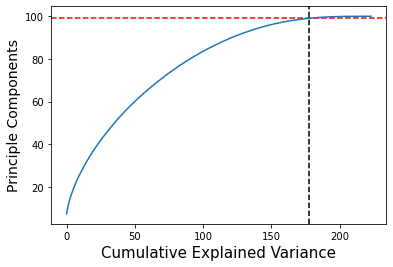

In [28]:
# There are so many columns so let's use the PCA

from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score

test_pca = PCA()
test_pca.fit(df_x)

var_cumu = np.cumsum(test_pca.explained_variance_ratio_)*100

k = np.argmax(var_cumu>99)

print("Number of components explained 99% variance : ",k)

plt.xlabel("Cumulative Explained Variance", fontsize=15)
plt.ylabel("Principle Components",fontsize=14)
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=99, color="r", linestyle="--")
plt.plot(var_cumu)
plt.show()

Out of 224 columns, only 178 columns is giving the 99% variance. So, let's use the PCA technique

In [29]:
# PCA Scaling for model building

pca = PCA(n_components=178)
xx = pca.fit_transform(df_x)
xx

array([[ 0.55167327, -1.68243849, -2.75687145, ...,  2.00041136,
         0.20218641,  0.19140015],
       [-1.47540331, -4.29410794,  5.16881095, ...,  0.12396094,
         0.46562139, -0.04739562],
       [-3.03321462,  0.29021695,  1.23491616, ..., -0.21899988,
        -0.16071469, -0.26405667],
       ...,
       [ 1.3150646 ,  0.89357769, -2.52428281, ..., -0.99770345,
        -0.10282966,  0.40298236],
       [ 7.33427706,  4.67216554,  2.63441039, ..., -0.73705323,
         0.07923788, -0.15016986],
       [-4.05576031,  1.90092431, -0.43732494, ...,  0.27960225,
        -0.07073335, -0.02879819]])

In [30]:
# Let's find best score with best state

def beststate(mod):
    max_score = 0
    max_state = 0
    start = time()
    for i in range(72,75):
        x_train, x_test, y_train, y_test = train_test_split(xx, y, test_size=0.25, random_state=i)
        mod.fit(x_train, y_train)
        y_pre = mod.predict(x_test)
        score = r2_score(y_test, y_pre)
        if score > max_score:
            max_score = score
            max_state = i
    print("Best Random State      : ",max_state)
    print("Best R2_Score          : ",max_score)
    print("Cross Validation Score : ",cross_val_score(mod, xx, y, cv=5, scoring="r2").mean())
    end = time()
    print("\nTime taken by model for prediction {:.4f} seconds".format(end-start))

In [31]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
beststate(DTR)

Best Random State      :  74
Best R2_Score          :  0.6099654901548897
Cross Validation Score :  0.5681136200436329

Time taken by model for prediction 1.6108 seconds


In [32]:
# K-Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()
beststate(KNR)

Best Random State      :  74
Best R2_Score          :  0.7851666406729343
Cross Validation Score :  0.7206743690972695

Time taken by model for prediction 0.1601 seconds


In [33]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
beststate(RFR)

Best Random State      :  74
Best R2_Score          :  0.8520819074256689
Cross Validation Score :  0.798165488343421

Time taken by model for prediction 94.3504 seconds


In [34]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
beststate(GBR)

Best Random State      :  74
Best R2_Score          :  0.8777306991050092
Cross Validation Score :  0.8266706549104758

Time taken by model for prediction 51.5057 seconds


In [35]:
# Support Vector Machine

from sklearn.svm import SVR

Svr = SVR()
beststate(Svr)

Best Random State      :  74
Best R2_Score          :  0.8151280610646361
Cross Validation Score :  0.7569259600455568

Time taken by model for prediction 1.1694 seconds


#### After analyzing the scores and cross validation scores of above 5 modesl. Now it is clear that Gradient Boosting Regressor is giving the best score than others. So, let's try to increase the score using HyperParameter Tuning.

### Final Model (Gradient Boosting Regressor)

In [36]:
# Hyper Parameter Tuning with Gradient Boosting Regressor

x_train, x_test, y_train, y_test = train_test_split(xx, y, test_size=0.25, random_state=74)

from sklearn.model_selection import GridSearchCV

param_grid = {"min_samples_leaf" : [1,2], "min_samples_split" : [2,3], "n_estimators" : [100,200], "learning_rate" : [0.1,0.2]}
grid_search = GridSearchCV(GBR, param_grid=param_grid)
grid_search.fit(x_train, y_train)
grid_search.best_params_


# Final Model

Final_Model = GradientBoostingRegressor(learning_rate=0.1,min_samples_split=2,min_samples_leaf=1,n_estimators=200)
x_train, x_test, y_train, y_test = train_test_split(xx, y, test_size=0.25, random_state=74)
Final_Model.fit(x_train, y_train)
y_pred = Final_Model.predict(x_test)
r2_score(y_test, y_pred)

0.8859580357559798

Final Score Improved after Hyperparameter Tunings. Looks Good.

In [37]:
# Now Let's transform the df_test data according to pca for sale price prediction

df_test_pca = pca.transform(df_test)
sale_pred = Final_Model.predict(df_test_pca)

# Let's make the data frame for sale price prediction

predict_sale_price = pd.DataFrame(sale_pred, columns = ["Sale Price"])

# Let's save the submission to csv file

predict_sale_price.to_csv("Sale Price Predictions.csv",index=False)

### Saving  The Final Model

In [38]:
import joblib

joblib.dump(Final_Model,"Final_Model.pkl")

['Final_Model.pkl']

### Loading The Final Model

In [39]:
model = joblib.load("Final_Model.pkl")
pd.DataFrame(model.predict(xx))

,0
0,11.752067
1,12.510115
2,12.476742
3,12.143553
4,12.285292
5,12.299942
6,11.954541
7,11.980965
8,11.840471
9,11.690578
